In [2]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the dataset

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels) #number of labels in the training set= 60000

60000

In [7]:
train_labels #each label is an integer between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## Preprocessing the Data

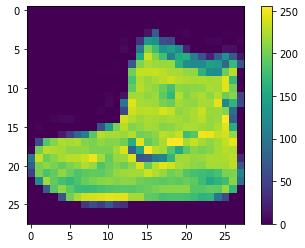

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [11]:
train_images = train_images/ 255
test_images = test_images/ 255

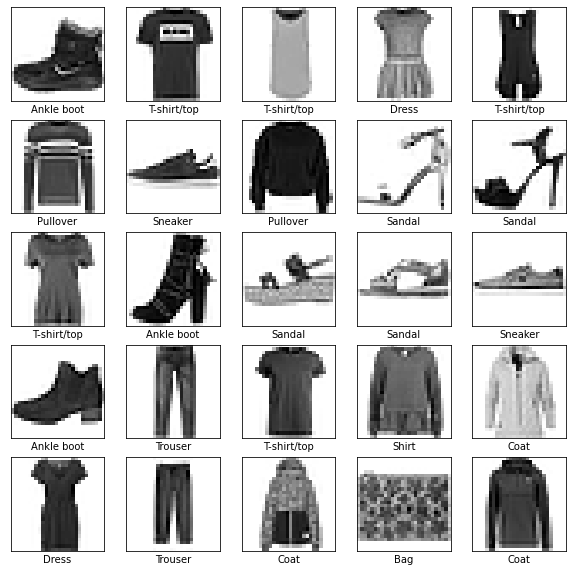

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

---
## Build the Model

#### Setup the layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compile the model

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5) #1 epoch is a full iteration of the training dataset 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5005 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3773 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8913


***
## Evaluating Accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy=', test_acc)

313/313 [==============================] - 0s 827us/step - loss: 0.3380 - accuracy: 0.8771
Test Accuracy= 0.8770999908447266


***

## Make Predictions

In [1]:
predictions = model.predict(test_images)

NameError: name 'model' is not defined

In [18]:
predictions [0]

array([1.2583900e-04, 2.7630071e-08, 3.0547499e-06, 9.2435977e-07,
       1.0587498e-05, 1.3527052e-02, 7.9161939e-05, 4.5508787e-02,
       1.6704545e-05, 9.4072789e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

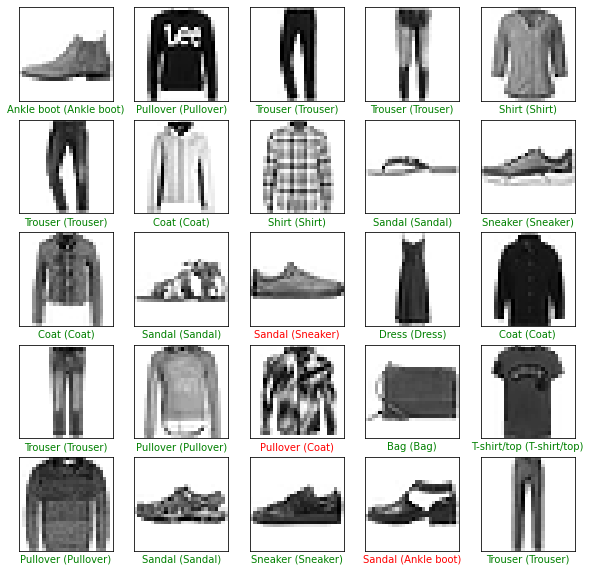

In [21]:
#plotting several images with their prediction; correct prediction labesl are green and incorrect ones are red

#this code plots the first 25 test images, their predicted label, and the true label

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    
    if predicted_label == true_label:
        color = 'green'
        
    else:
        color='red'
        
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]),
                                color=color)

### Making Predictions abt a single image

In [23]:
#Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [24]:
#Add image to a batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [25]:
predictions = model.predict(img)
print(predictions)

[[1.25838880e-04 2.76300174e-08 3.05474691e-06 9.24358915e-07
  1.05874869e-05 1.35270255e-02 7.91617858e-05 4.55087535e-02
  1.67045455e-05 9.40727890e-01]]


In [26]:
prediction = predictions[0]
np.argmax(prediction)

9